In [1]:
import os
import os.path
import pandas as pd
import sys
sys.path.append('..')
from src.utils.data import writePandas, getPandas, getConfig, getDict, writeGraph, getGraph
from process.preproc_img import ImageStatistics
from src.model.feature import load_graph_weight, load_node_degree
os.chdir('..')
os.getcwd()

'/home/biobot/disk/ldopa'

In [2]:
data = getPandas('pat_data')
conf = getConfig('data')
train_idx = conf['indices']['pat']['train']
test_idx = conf['indices']['pat']['test']
train_weights, test_weights = load_graph_weight(data, train_idx, test_idx, None)
train_cat = data.loc[train_idx, 'CAT'].to_numpy()
test_cat = data.loc[test_idx, 'CAT'].to_numpy()

In [3]:
train_neg = train_weights.iloc[train_cat == 0, :]
train_pos = train_weights.iloc[train_cat == 1, :]
test_pos = test_weights.iloc[test_cat == 1, :]
test_neg = test_weights.iloc[test_cat == 0, :]

In [4]:
len(test_idx)

46

0


<AxesSubplot: ylabel='Count'>

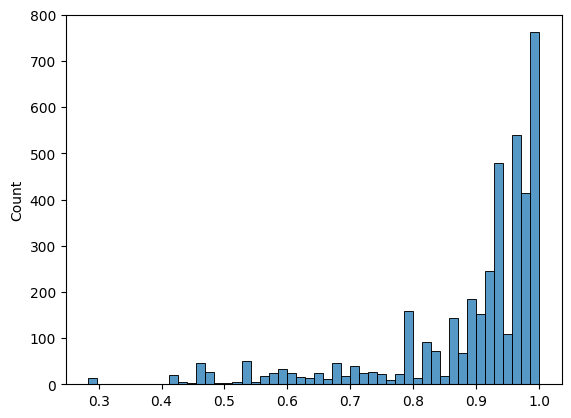

In [5]:
from scipy.stats import ttest_ind, mannwhitneyu
from statsmodels.stats.multitest import fdrcorrection
ps = []
for col in train_neg.columns:
    ln = len(train_neg[col])
    lp = len(train_pos[col])
    train_neg_col = train_neg[col].to_numpy()
    train_pos_col = train_pos[col].to_numpy()
    test_neg_col = test_neg[col].to_numpy()
    test_pos_col = test_pos[col].to_numpy()
    train_p = mannwhitneyu(train_neg_col, train_pos_col)[1]
    test_p = mannwhitneyu(test_neg_col, test_pos_col)[1]
    ps.append(train_p)
fdr = fdrcorrection(ps, alpha=0.05)
print(sum(fdr[1] < 0.05))
import seaborn as sns
sns.histplot(fdr[1])

In [6]:
params = {}
params['global_cols'] = ['cp', 'ge', 'le', 'cpl', 'mod', 'sigma', 'ne', 'spl']
params['nodal_cols'] = ['dc', 'bc', 'ncc', 'degree']
train_metrics, test_metrics = load_node_degree(data, train_idx, test_idx, params)
train_neg = train_metrics.iloc[train_cat == 0, :]
train_pos = train_metrics.iloc[train_cat == 1, :]
test_neg = test_metrics.iloc[test_cat == 0, :]
test_pos = test_metrics.iloc[test_cat == 1, :]

In [8]:
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
ps = []
for col in train_neg.columns:
    train_neg_col = train_neg[col].to_numpy().astype(float)
    train_pos_col = train_pos[col].to_numpy().astype(float)
    test_neg_col = test_neg[col].to_numpy().astype(float)
    test_pos_col = test_pos[col].to_numpy().astype(float)
    train_p = ttest_ind(train_neg_col, train_pos_col)[1]
    test_p = ttest_ind(test_neg_col, test_pos_col)[1]
    ps.append(train_p)
fdr = fdrcorrection(ps, alpha=0.05)
print(sum(fdr[1] < 0.05))
print('Network feature counts (p<0.05): before FDR {}, after FDR {}'.format(sum([p < 0.05 for p in ps]), sum(fdr[1] < 0.05)))
    #print("col: {}, train_p: {}, test_p: {}".format(col, train_p, test_p))
    #if train_p < 0.05:
        #sns.histplot(data=train_neg_col, color='blue', alpha=0.5)
        #sns.histplot(data=train_pos_col, color='red', alpha=0.5)
        #plt.title("Train {}".format(col))
        #plt.legend(['neg', 'pos'])
        #plt.show()
        #sns.histplot(data=test_neg_col, color='blue', alpha=0.5)
        #sns.histplot(data=test_pos_col, color='red', alpha=0.5)
        #plt.title("Test {}".format(col))
        #plt.legend(['neg', 'pos'])
        #plt.show()

0
Network feature counts (p<0.05): before FDR 19, after FDR 0
